In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Plotting training data
xd,yd,zd = np.loadtxt('train_knn.txt',unpack=True, delimiter=',')
print(type(xd),xd)
print(yd)
print(zd)

<class 'numpy.ndarray'> [7. 7. 6. 7. 7. 6. 6. 3. 2. 3. 4. 3. 4. 1.]
[7. 4. 4. 5. 6. 7. 6. 4. 3. 2. 3. 3. 4. 4.]
[1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2.]


In [2]:
# Train data with class
datacl = np.zeros((len(xd),3))
print(datacl.shape, datacl.ndim)

for h in range(len(xd)):
    datacl[h][0]=xd[h]
    datacl[h][1]=yd[h]
    datacl[h][2]=zd[h]
print(datacl, type(datacl))       


(14, 3) 2
[[7. 7. 1.]
 [7. 4. 1.]
 [6. 4. 1.]
 [7. 5. 1.]
 [7. 6. 1.]
 [6. 7. 1.]
 [6. 6. 1.]
 [3. 4. 2.]
 [2. 3. 2.]
 [3. 2. 2.]
 [4. 3. 2.]
 [3. 3. 2.]
 [4. 4. 2.]
 [1. 4. 2.]] <class 'numpy.ndarray'>


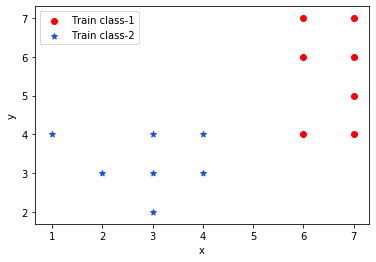

In [3]:
plt.xlabel('x')
plt.ylabel('y')
for m in range(len(zd)):
    if datacl[m][2]==1:
        xc1=plt.scatter(datacl[m][0], datacl[m][1], color='r')
    elif datacl[m][2]==2:
        xc2=plt.scatter(datacl[m][0], datacl[m][1], marker='*', color='#184DD5')
        
plt.legend([xc1, xc2], ["Train class-1", "Train class-2"])
plt.show()

In [4]:
#Test Data before classification
xt,yt = np.loadtxt('test_knn.txt',unpack=True, delimiter=',')
data = np.zeros((len(xt),2))
print(data.shape, data.ndim)

for h in range(len(xt)):
    data[h][0]=xt[h]
    data[h][1]=yt[h]
print(data, type(data))      

(9, 2) 2
[[3. 7.]
 [7. 7.]
 [4. 3.]
 [2. 8.]
 [3. 5.]
 [1. 2.]
 [4. 8.]
 [8. 3.]
 [8. 4.]] <class 'numpy.ndarray'>


In [5]:
k = input("Enter your value: ") 
k=int(k)
cl=[]
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return np.sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(train_row, test_row)
        distances.append((train_row, dist))
        #index[1]=dist 
    distances.sort(key=lambda index: index[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append((distances[i][0],distances[i][1]))
    return neighbors

# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    cnt=0
    print('TestPoint: ',test_row[0],',',test_row[1])
    for neighbor in neighbors:
        cnt=cnt+1
        print('Distance',cnt,':%.3f'%neighbor[1],'\tclass:',neighbor[0][-1])
    output_values = [row[0][-1] for row in neighbors]
    #max among set of clases count
    prediction = max(set(output_values), key=output_values.count)
    return prediction

for n in range(len(data)):
    prediction = predict_classification(datacl, data[n], k)
    cl.append(prediction)
    print('Predicted Class: %d' % (prediction))
    print()



Enter your value: 3
TestPoint:  3.0 , 7.0
Distance 1 :3.000 	class: 1.0
Distance 2 :3.000 	class: 2.0
Distance 3 :3.162 	class: 1.0
Predicted Class: 1

TestPoint:  7.0 , 7.0
Distance 1 :0.000 	class: 1.0
Distance 2 :1.000 	class: 1.0
Distance 3 :1.000 	class: 1.0
Predicted Class: 1

TestPoint:  4.0 , 3.0
Distance 1 :0.000 	class: 2.0
Distance 2 :1.000 	class: 2.0
Distance 3 :1.000 	class: 2.0
Predicted Class: 2

TestPoint:  2.0 , 8.0
Distance 1 :4.123 	class: 1.0
Distance 2 :4.123 	class: 2.0
Distance 3 :4.123 	class: 2.0
Predicted Class: 2

TestPoint:  3.0 , 5.0
Distance 1 :1.000 	class: 2.0
Distance 2 :1.414 	class: 2.0
Distance 3 :2.000 	class: 2.0
Predicted Class: 2

TestPoint:  1.0 , 2.0
Distance 1 :1.414 	class: 2.0
Distance 2 :2.000 	class: 2.0
Distance 3 :2.000 	class: 2.0
Predicted Class: 2

TestPoint:  4.0 , 8.0
Distance 1 :2.236 	class: 1.0
Distance 2 :2.828 	class: 1.0
Distance 3 :3.162 	class: 1.0
Predicted Class: 1

TestPoint:  8.0 , 3.0
Distance 1 :1.414 	class: 1.0
Dist

In [6]:
#test data with predicted class
dataP = np.zeros((len(data),3))

for h in range(len(data)):
    dataP[h][0]=data[h][0]
    dataP[h][1]=data[h][1]
    dataP[h][2]=cl[h]
print(dataP, type(dataP))       


[[3. 7. 1.]
 [7. 7. 1.]
 [4. 3. 2.]
 [2. 8. 2.]
 [3. 5. 2.]
 [1. 2. 2.]
 [4. 8. 1.]
 [8. 3. 1.]
 [8. 4. 1.]] <class 'numpy.ndarray'>


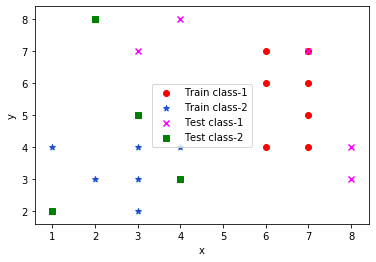

In [10]:
plt.xlabel('x')
plt.ylabel('y')
for m in range(len(datacl)):
    if datacl[m][2]==1:
        xc1=plt.scatter(datacl[m][0], datacl[m][1], color='red')
    elif datacl[m][2]==2:
        xc2=plt.scatter(datacl[m][0], datacl[m][1], marker='*', color='#184DD5')
        
for n in range(len(dataP)):
    if dataP[n][2]==1:
        xtc1=plt.scatter(dataP[n][0], dataP[n][1],marker='x', color='magenta')
    elif dataP[n][2]==2:
        xtc2=plt.scatter(dataP[n][0], dataP[n][1], marker='s', color='green')
        
plt.legend([xc1, xc2, xtc1, xtc2], ["Train class-1", "Train class-2", "Test class-1", "Test class-2"])
plt.show()